**Imports**

In [280]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from scipy.sparse import hstack
from sklearn.preprocessing import MinMaxScaler


**Loading the data**

In [281]:
data = pd.read_csv("data/properties.csv")

data.head()

data.columns


Index(['id', 'price', 'property_type', 'subproperty_type', 'region',
       'province', 'locality', 'zip_code', 'latitude', 'longitude',
       'construction_year', 'total_area_sqm', 'surface_land_sqm',
       'nbr_frontages', 'nbr_bedrooms', 'equipped_kitchen', 'fl_furnished',
       'fl_open_fire', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm',
       'fl_swimming_pool', 'fl_floodzone', 'state_building',
       'primary_energy_consumption_sqm', 'epc', 'heating_type',
       'fl_double_glazing', 'cadastral_income'],
      dtype='object')

Defining features and target

In [282]:
num_features = ["price", "total_area_sqm", "latitude", "longitude",'surface_land_sqm', "garden_sqm", "primary_energy_consumption_sqm", "construction_year", "cadastral_income", 'nbr_frontages', 'nbr_bedrooms', "terrace_sqm" ]

fl_features = ["fl_garden", "fl_furnished", "fl_open_fire", "fl_terrace","fl_swimming_pool", "fl_floodzone", "fl_double_glazing"]

cat_features = ["property_type", "subproperty_type", "region", "province", "locality", "zip_code", "state_building", "epc", "heating_type", 'equipped_kitchen']

In [283]:
y = data["price"]

num_values = data[num_features]

cat_values = data[cat_features]

bin_values = data[fl_features]

print(type(num_values))

<class 'pandas.core.frame.DataFrame'>


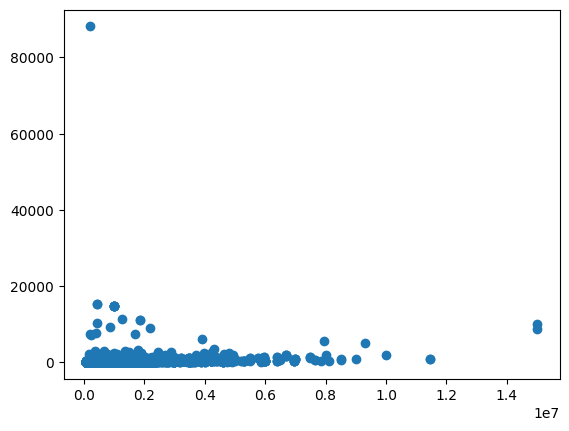

In [284]:
plt.scatter(data["price"], data["total_area_sqm"])
plt.show()

**NUMERIC**

Handling outliers

In [285]:
for feature in data[num_features]:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
        
    max = Q3 + (1.5 * IQR)
    min = Q1 - (1.5 * IQR)
        
    data.loc[data[feature] < min, feature] = np.nan
    data.loc[data[feature] > max, feature] = np.nan
    

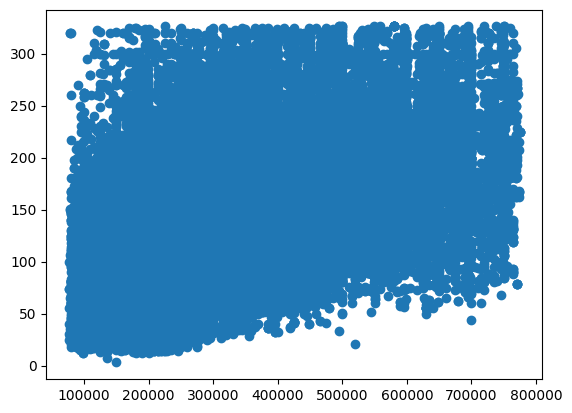

In [286]:
plt.scatter(data["price"], data["total_area_sqm"])
plt.show()

In [297]:
scaler = MinMaxScaler()

num_scaled = scaler.fit_transform(data[num_features].to_numpy())
num_scaled = pd.DataFrame(num_scaled, columns = num_features)

Imputation with mean:

In [288]:
# Imputing missing values with mean:
imputer = SimpleImputer(strategy="mean")
imputer.fit(num_scaled[num_features])
imp_num = imputer.transform(num_scaled[num_features])

# Defining new dataframe with missing values and appropriate column names
imp_num = pd.DataFrame(num_scaled, columns = num_features)

Numeric values - correlations

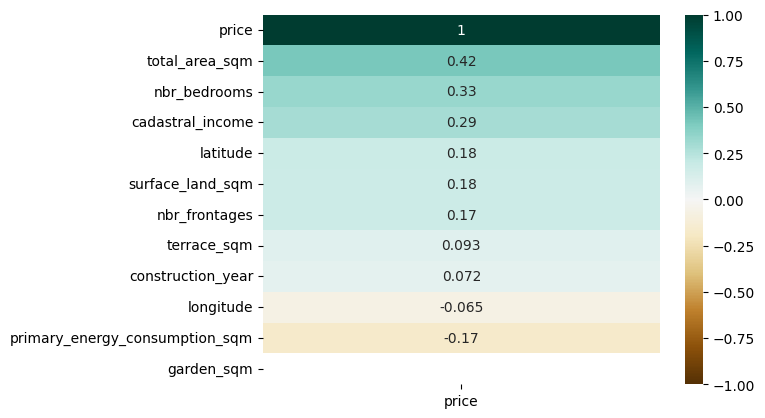

In [289]:
heatmap = sns.heatmap((num_scaled).corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


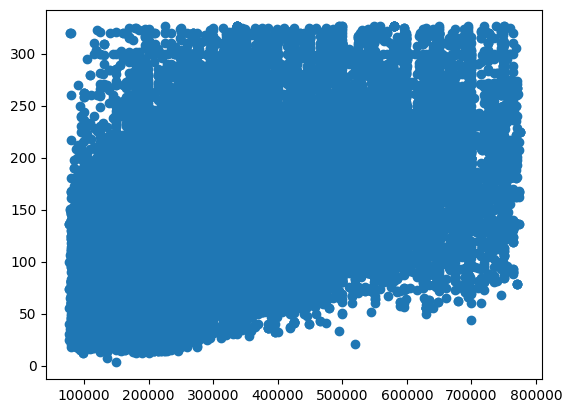

In [290]:
plt.scatter(imp_num["price"], imp_num["total_area_sqm"])
plt.show()

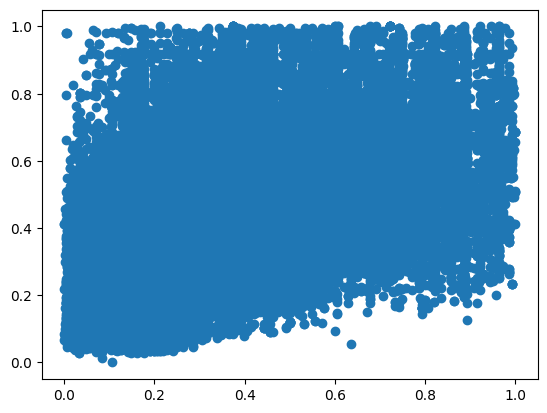

In [291]:
plt.scatter(num_scaled["price"], num_scaled["total_area_sqm"])
plt.show()

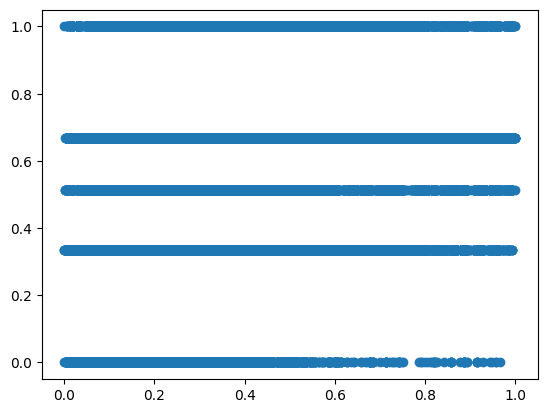

In [292]:
plt.scatter(num_scaled["price"], num_scaled["nbr_bedrooms"])
plt.show()

Categorical values - preprocessing

In [293]:
#Replacing MISSING with None
data[cat_features] = data[cat_features].replace("MISSING", None)

data[cat_features].dropna()

data["equipped_kitchen"].isnull().sum()

data["equipped_kitchen"].value_counts().to_frame()



,count
equipped_kitchen,
INSTALLED,19373
HYPER_EQUIPPED,9058
SEMI_EQUIPPED,5119
USA_HYPER_EQUIPPED,4092
NOT_INSTALLED,2676
USA_INSTALLED,1662
USA_SEMI_EQUIPPED,417
USA_UNINSTALLED,92


Categorical values - Correlations

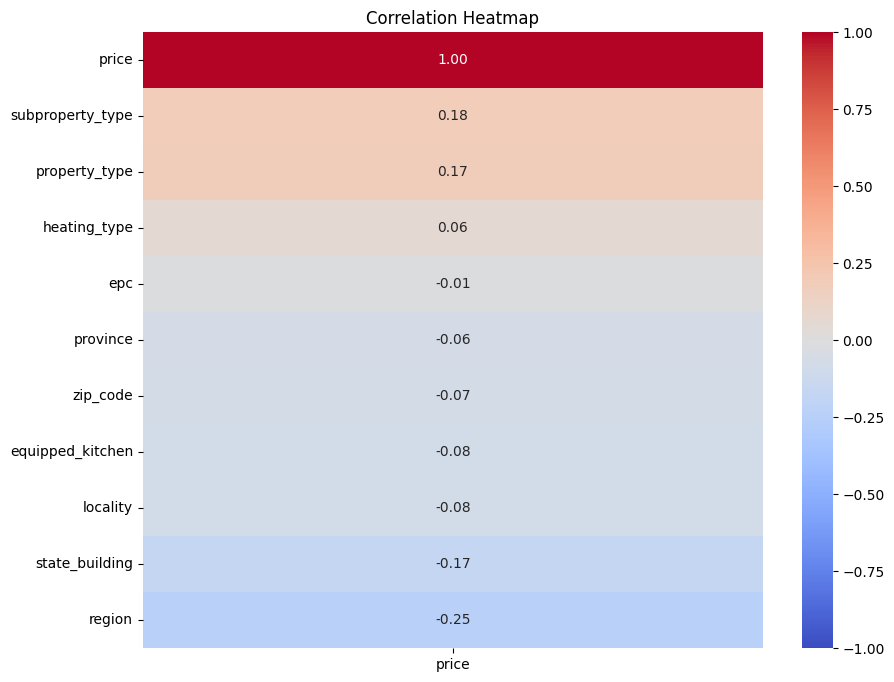

In [294]:
encoded_df = pd.DataFrame()

label_encoders = {}

for column in cat_values.columns:
    le = LabelEncoder()
    encoded_df[column] = le.fit_transform(cat_values[column])
    label_encoders[column] = le

encoded_df['price'] = data['price']

plt.figure(figsize=(10, 8))
sns.heatmap(encoded_df.corr()[["price"]].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Binary data - preprocessing

In [295]:
data[fl_features].isnull().sum()

fl_garden            0
fl_furnished         0
fl_open_fire         0
fl_terrace           0
fl_swimming_pool     0
fl_floodzone         0
fl_double_glazing    0
dtype: int64

Fl features - correltaions

In [296]:
sns.heatmap(data[fl_features].corr()[["price"]].sort_values(by = "price", ascending = False))

KeyError: "None of [Index(['price'], dtype='object')] are in the [columns]"